In [1]:
import joblib
preprocessed_data = joblib.load('preprocessed_data.sav')

In [2]:
preprocced_targets = joblib.load('preprocessed_targets.sav')

In [3]:
from sklearn.model_selection import train_test_split
data_train, data_test, targets_train, targets_test = train_test_split(preprocessed_data, preprocced_targets, test_size=0.2, random_state=0)
data_train_index = data_train[:,0]
data_train = data_train[:,1:]
data_test_index = data_test[:,0]
data_test = data_test[:,1:]

In [5]:
import pandas as pd
models = pd.DataFrame()

In [6]:
lmod = ['Multinomial Naïve Bayes','SVC with Linear Kernel','SVC with RBF Kernel','Gradient Boosting Classifier','Random Forest Classifier']

In [22]:
lac = []
lpr = []
lrc = []

In [23]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [24]:
from sklearn.naive_bayes import MultinomialNB
clf1 = MultinomialNB()
clf1.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [25]:
clf1.fit(data_train, targets_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [27]:
targets_pred = clf1.predict(data_test)
ac = metrics.accuracy_score(targets_test, targets_pred)
print("Accuracy:",ac)
lac.append(ac)
pr = metrics.precision_score(targets_test, targets_pred,average='macro')
print("Precision:",pr)
lpr.append(pr)
rc = metrics.recall_score(targets_test, targets_pred,average='macro')
print("Recall:",rc)
lrc.append(rc)

Accuracy: 0.6772406847935549
Precision: 0.6474108343714159
Recall: 0.6163809294870347


In [28]:
from sklearn import svm, metrics
from sklearn.multiclass import OneVsRestClassifier
clf4 = OneVsRestClassifier(svm.SVC(gamma='auto', C=1., probability=True, class_weight='balanced', kernel='linear'))
clf4.fit(data_train, targets_train)

OneVsRestClassifier(estimator=SVC(C=1.0, cache_size=200,
                                  class_weight='balanced', coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='auto', kernel='linear', max_iter=-1,
                                  probability=True, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=None)

In [29]:
targets_pred = clf4.predict(data_test)
ac = metrics.accuracy_score(targets_test, targets_pred)
print("Accuracy:",ac)
lac.append(ac)
pr = metrics.precision_score(targets_test, targets_pred,average='macro')
print("Precision:",pr)
lpr.append(pr)
rc = metrics.recall_score(targets_test, targets_pred,average='macro')
print("Recall:",rc)
lrc.append(rc)

Accuracy: 0.6968781470292045
Precision: 0.671432991719877
Recall: 0.6514083976697607


In [30]:
clf3 = OneVsRestClassifier(svm.SVC(gamma=0.1, C=20, probability=True, class_weight='balanced', kernel='rbf'))
clf3.fit(data_train, targets_train)

OneVsRestClassifier(estimator=SVC(C=20, cache_size=200, class_weight='balanced',
                                  coef0=0.0, decision_function_shape='ovr',
                                  degree=3, gamma=0.1, kernel='rbf',
                                  max_iter=-1, probability=True,
                                  random_state=None, shrinking=True, tol=0.001,
                                  verbose=False),
                    n_jobs=None)

In [31]:
targets_pred = clf3.predict(data_test)
ac = metrics.accuracy_score(targets_test, targets_pred)
print("Accuracy:",ac)
lac.append(ac)
pr = metrics.precision_score(targets_test, targets_pred,average='macro')
print("Precision:",pr)
lpr.append(pr)
rc = metrics.recall_score(targets_test, targets_pred,average='macro')
print("Recall:",rc)
lrc.append(rc)

Accuracy: 0.6576032225579054
Precision: 0.6740387300173539
Recall: 0.5310938563268094


In [32]:
lac

[0.6772406847935549, 0.6968781470292045, 0.6576032225579054]

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
clf2 = GradientBoostingClassifier()
#clf2.get_params()

In [34]:
clf2.fit(data_train, targets_train)
targets_pred = clf2.predict(data_test)
ac = metrics.accuracy_score(targets_test, targets_pred)
print("Accuracy:",ac)
lac.append(ac)
pr = metrics.precision_score(targets_test, targets_pred,average='macro')
print("Precision:",pr)
lpr.append(pr)
rc = metrics.recall_score(targets_test, targets_pred,average='macro')
print("Recall:",rc)
lrc.append(rc)

Accuracy: 0.6802618328298087
Precision: 0.7019910156025927
Recall: 0.5819731409159796


In [35]:
from sklearn.ensemble import RandomForestClassifier
clf3 = RandomForestClassifier()

In [36]:
clf3.fit(data_train, targets_train)
targets_pred = clf3.predict(data_test)
ac = metrics.accuracy_score(targets_test, targets_pred)
print("Accuracy:",ac)
lac.append(ac)
pr = metrics.precision_score(targets_test, targets_pred,average='macro')
print("Precision:",pr)
lpr.append(pr)
rc = metrics.recall_score(targets_test, targets_pred,average='macro')
print("Recall:",rc)
lrc.append(rc)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.6777442094662638
Precision: 0.6841338001600311
Recall: 0.5430572085867856


In [ ]:
#print("Accuracy:",metrics.accuracy_score(targets_test, targets_pred))
#print("Precision:",metrics.precision_score(targets_test, targets_pred,average='macro'))
#print("Recall:",metrics.recall_score(targets_test, targets_pred,average='macro'))

In [37]:
models['Classifier']=lmod
models['Accuracy']=lac
models['Precision']=lpr
models['Recall']=lrc

In [38]:
models

,Classifier,Accuracy,Precision,Recall
0,Multinomial Naïve Bayes,0.677241,0.647411,0.616381
1,SVC with Linear Kernel,0.696878,0.671433,0.651408
2,SVC with RBF Kernel,0.657603,0.674039,0.531094
3,Gradient Boosting Classifier,0.680262,0.701991,0.581973
4,Random Forest Classifier,0.677744,0.684134,0.543057


In [57]:
import matplotlib.pyplot as pt

In [59]:
plt.set_xticklabels(models.Classifier)

[Text(0.0, 0, 'Multinomial Naïve Bayes'),
 Text(0.5, 0, 'SVC with Linear Kernel'),
 Text(1.0, 0, 'SVC with RBF Kernel'),
 Text(1.5, 0, 'Gradient Boosting Classifier'),
 Text(2.0, 0, 'Random Forest Classifier')]

In [60]:
print(cmpgraph)

[Text(0.0, 0, 'Multinomial Naïve Bayes'), Text(0.5, 0, 'SVC with Linear Kernel'), Text(1.0, 0, 'SVC with RBF Kernel'), Text(1.5, 0, 'Gradient Boosting Classifier'), Text(2.0, 0, 'Random Forest Classifier')]


In [61]:
plt

In [62]:
pt.show()

In [63]:
md = pd.DataFrame(index = lmod)

In [64]:
md['Accuracy']=lac
md['Precision']=lpr
md['Recall']=lrc

In [65]:
md

,Accuracy,Precision,Recall
Multinomial Naïve Bayes,0.677241,0.647411,0.616381
SVC with Linear Kernel,0.696878,0.671433,0.651408
SVC with RBF Kernel,0.657603,0.674039,0.531094
Gradient Boosting Classifier,0.680262,0.701991,0.581973
Random Forest Classifier,0.677744,0.684134,0.543057


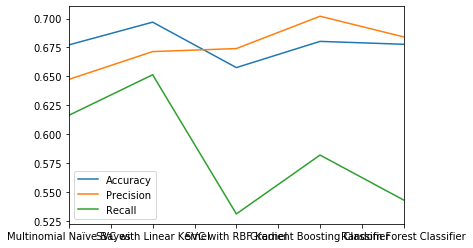

In [70]:
plt = md.plot()

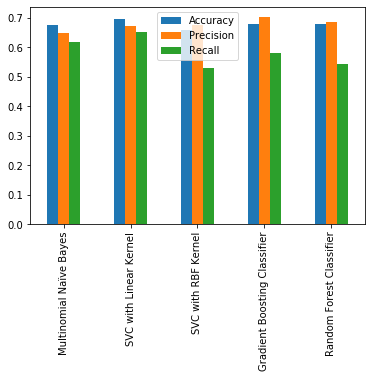

In [69]:
plt = md.plot(kind='bar')

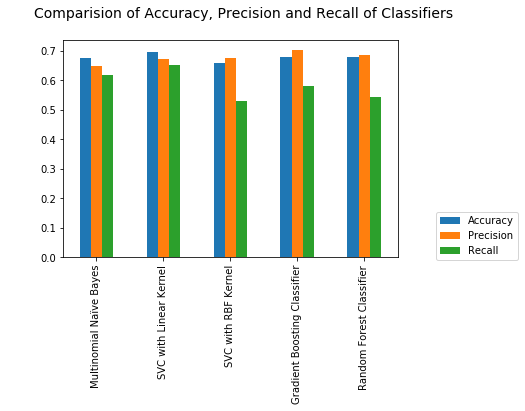

In [79]:
f = pt.figure()

pt.title('      Comparision of Accuracy, Precision and Recall of Classifiers\n', color='black', fontsize=14)
md.plot(kind='bar', ax=f.gca())
pt.legend(loc='center left', bbox_to_anchor=(1.1, 0.1))
pt.show()